In [31]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import seaborn as sns
import os.path
#from scikit import LocalOutlierFactor

In [32]:
panj = pd.read_pickle("./panj_outlier.pkl")  
dnevnik = pd.read_pickle('./dnevnik_cleaned.pkl')
vreme = pd.read_pickle('./vreme_cleaned.pkl')
#window = en teden

In [33]:
panj['year'] = panj['date'].dt.year
panj['month'] = panj['date'].dt.month
panj = panj.loc[panj['month'] == 6]
panj = panj.loc[panj['year'] == 2019]

dnevnik['year'] = dnevnik['date'].dt.year
dnevnik['month'] = dnevnik['date'].dt.month
dnevnik = dnevnik.loc[dnevnik['month'] == 6]
dnevnik = dnevnik.loc[dnevnik['year'] == 2019]

In [34]:
panj.head()
####

,resId,siteNo,hiveNo,frameNo,hour,paramText,anMethText,resVal,resUnit,resUnit_desc,resValUncert,resValUncertSD,resQualValue,date,year,month
162858,CW207781,3,1,NaN,0,Colony weight,Automatic recording,24.6,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 00:00:00,2019,6
162857,CW207782,3,1,NaN,1,Colony weight,Automatic recording,24.6,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 01:00:00,2019,6
162855,CW207783,3,1,NaN,2,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 02:00:00,2019,6
162854,CW207784,3,1,NaN,3,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 03:00:00,2019,6
162853,CW207785,3,1,NaN,4,Colony weight,Automatic recording,24.5,G167A,Kilogram,NaN,NaN,NaN,2019-06-01 04:00:00,2019,6


In [35]:
dnevnik.head()

,eventType,inoutType,inoutQuantity,inoutUnit,inoutUnit_desc,clinicalSigns,eventDescription,date,year,month
94,INPUT,Queen excluder,0.800,G167A,Kilogram,No clinical signs,NaN,2019-06-28,2019,6
1754,OUTPUT,Brood comb,0.231,G167A,Kilogram,No clinical signs,NaN,2019-06-12,2019,6


In [36]:
panj = panj.reset_index()
dnevnik = dnevnik.reset_index()
print(dnevnik.index)
print(panj.index)
print(panj.iloc[2]['year'])
print(panj.loc[:, 'resVal'])

RangeIndex(start=0, stop=2, step=1)
RangeIndex(start=0, stop=614, step=1)
2019
0      24.6
1      24.6
2      24.5
3      24.5
4      24.5
       ... 
609    24.8
610    25.0
611    25.0
612    24.9
613    24.9
Name: resVal, Length: 614, dtype: float64


In [37]:
#def cebelarski_dnevnik(dataframe_dnevnika, df_teze):
  #Prilagodi vse nadaljne meritve v df_teze glede na input/output na določen datum dnevnika.
  #Npr. če 1. maja. 10:00 doda čebelar dva panela v teži 5 kg, prilagodimo vse teže od te meritve naprej -5kg
  #Dodatek če je sprememba lokalna (npr. dodatek hrane? [niti ne vem kaj bi lahko bilo]) in dodatek argumenta v funkcijo v kakšnem oknu vpliva. Tega še ni treba razmišljati, najprej ostalo

In [38]:
"""panj = cebelarski_dnevnik(panj, ...)"""

'panj = cebelarski_dnevnik(panj, ...)'

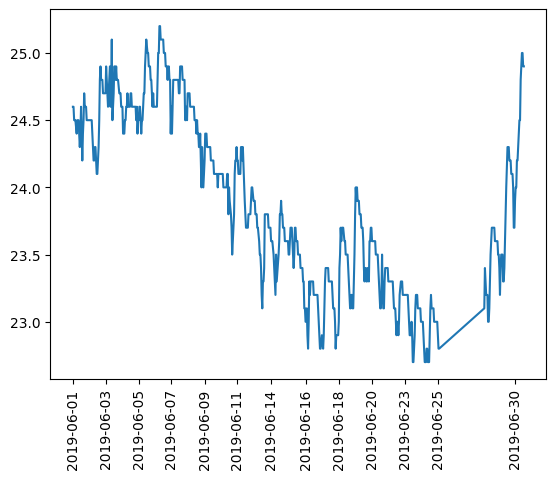

In [39]:
plt.plot(panj['date'], panj['resVal'], '-')
plt.xticks(panj['date'][::50],  rotation='vertical')
#dodamo plotu oznako, kjer smo dodali / odvzeli tezo
plt.show()

In [40]:
#panj_.to_pickle("./panj_outlier+dnevnik.pkl")

In [41]:
print(panj)

      index     resId  siteNo  hiveNo frameNo  hour      paramText  \
0    162858  CW207781       3       1     NaN     0  Colony weight   
1    162857  CW207782       3       1     NaN     1  Colony weight   
2    162855  CW207783       3       1     NaN     2  Colony weight   
3    162854  CW207784       3       1     NaN     3  Colony weight   
4    162853  CW207785       3       1     NaN     4  Colony weight   
..      ...       ...     ...     ...     ...   ...            ...   
609  161250  CW208463       3       1     NaN    18  Colony weight   
610  161249  CW208464       3       1     NaN    20  Colony weight   
611  161247  CW208465       3       1     NaN    21  Colony weight   
612  161246  CW208466       3       1     NaN    22  Colony weight   
613  161245  CW208467       3       1     NaN    23  Colony weight   

              anMethText  resVal resUnit resUnit_desc  resValUncert  \
0    Automatic recording    24.6   G167A     Kilogram           NaN   
1    Automatic re

In [42]:
a = dnevnik.loc[:, 'eventType']
print(a)

0     INPUT
1    OUTPUT
Name: eventType, dtype: object


In [43]:
def odstranjeni_posegi():
    for i in dnevnik[:, 'eventType']:
        if i == 'INPUT':
            datum = dnevnik['date'][panj.loc[panj['date'] == 'a' ]]
            for j in panj['resVal']:
                if panj['date'][j] >= datum:
                    panj['resVal'][j] - dnevnik['inoutQuantity'][i]
        elif i == 'OUTPUT':
            datum = dnevnik['date'][i]
            for j in panj['resVal']:
                if panj['date'][j] >= datum:
                    panj['resVal'][j] + dnevnik['inoutQuantity'][i]
    
    
# plt.plot(panj['date'], panj['resVal'], '-')
# plt.xticks(panj['date'][::50],  rotation='vertical')
# #dodamo plotu oznako, kjer smo dodali / odvzeli tezo
# plt.show()
